In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# using boston house price dataset

boston_df=pd.read_csv('boston_house_prices.csv',header=1)
df=boston_df.rename(columns={'MEDV':'Price'})
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# checking missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.shape

(506, 14)

In [6]:
# Description of Boston Dataset in Sklearn
# The Boston Housing dataset contains several columns that are used to describe various aspects of residential homes in Boston. Here is a description of each column in the dataset:

# CRIM: Per capita crime rate by town. It indicates the level of crime in the area.
# ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. This feature reflects the area's residential density.
# INDUS: Proportion of non-retail business acres per town. This is an indicator of the commercial use of land away from residential areas.
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). This indicates whether the property is near the Charles River, which may add to the aesthetic value of the neighborhood.
# NOX: Nitric oxides concentration (parts per 10 million). It represents the level of industrial pollutants in the area.
# RM: Average number of rooms per dwelling. More rooms typically indicate more spacious accommodation.
# AGE: Proportion of owner-occupied units built prior to 1940. Older structures might lack newer amenities or could be considered more prestigious depending on the architecture and condition.
# DIS: Weighted distances to five Boston employment centres. This feature measures the accessibility to workplaces, which can influence housing prices.
# RAD: Index of accessibility to radial highways. Higher values indicate easier access to major roadways.
# TAX: Full-value property-tax rate per $10,000. This reflects the annual property tax rate.
# PTRATIO: Pupil-teacher ratio by town. Lower values typically indicate better educational facilities, which is a significant factor for families when choosing a home.

In [7]:
# exploratery data analysis

# corelation
df.corr() # --> by default it checks pearson coreation range is -1 to +1 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
import seaborn as sns
# sns.pairplot(df)

Text(0, 0.5, 'price')

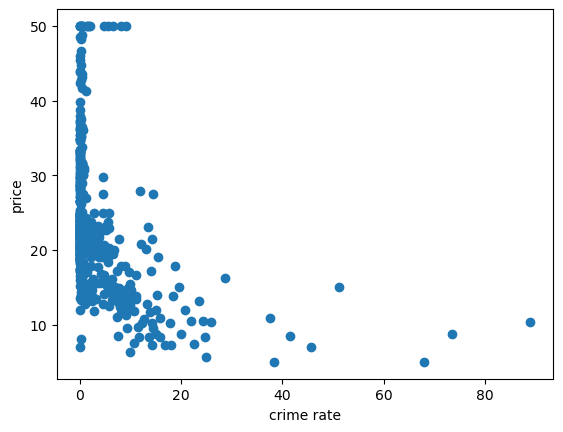

In [9]:
# analyze the corelated features
# we check for dependent and independent as well as independent and independent(if two independent are highly corelated then we can remove one)

plt.scatter(df['CRIM'],df['Price'])
plt.xlabel('crime rate')
plt.ylabel('price')

Text(0, 0.5, 'price')

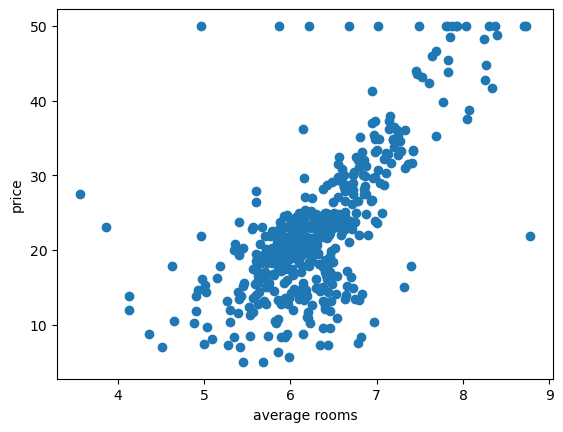

In [10]:
plt.scatter(df['RM'],df['Price'])
plt.xlabel('average rooms')
plt.ylabel('price')

<Axes: xlabel='RM', ylabel='Price'>

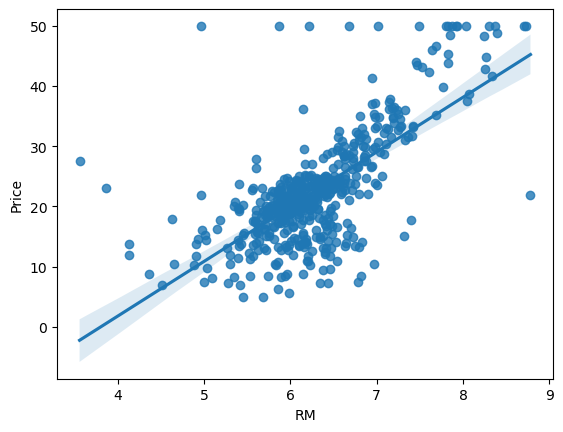

In [11]:
sns.regplot(x='RM',y='Price',data=df)

<Axes: xlabel='CRIM', ylabel='Price'>

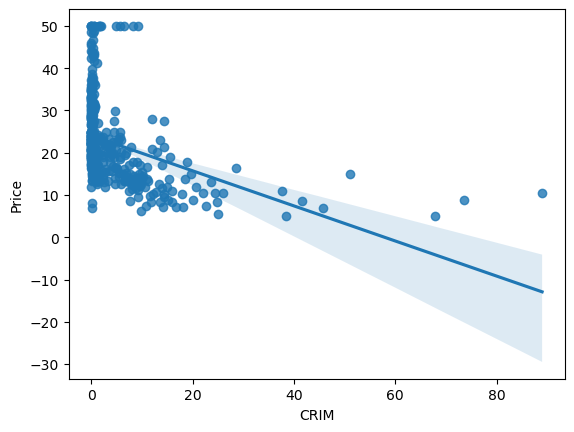

In [12]:
sns.regplot(x='CRIM',y='Price',data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

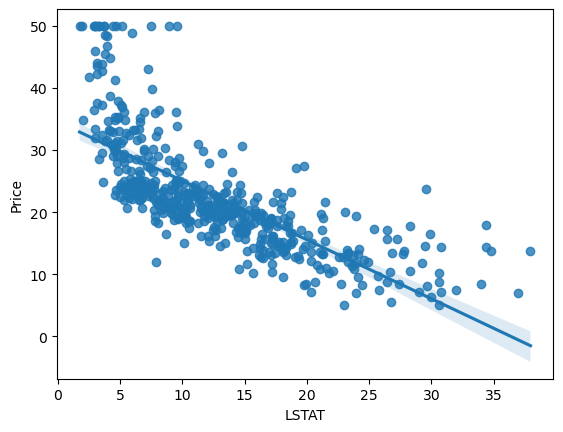

In [13]:
sns.regplot(x='LSTAT',y='Price',data=df)

<Axes: xlabel='CHAS', ylabel='Price'>

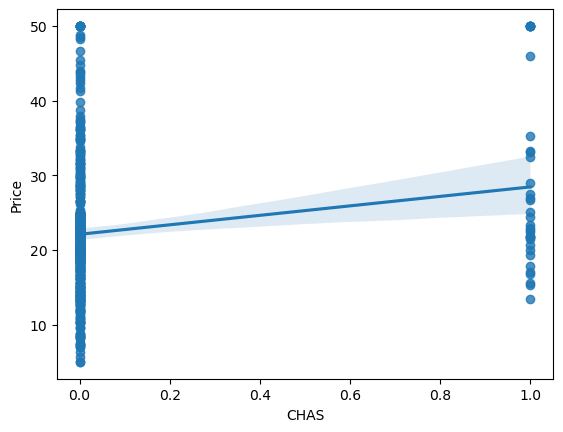

In [14]:
sns.regplot(x='CHAS',y='Price',data=df)  # not much corelated

<Axes: xlabel='PTRATIO', ylabel='Price'>

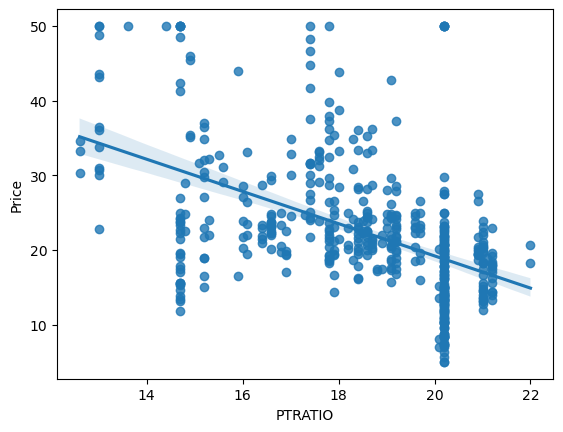

In [15]:
sns.regplot(x='PTRATIO',y='Price',data=df)

In [16]:
# model building

X=df.drop(df[['Price']],axis=1)
y=df[['Price']]

In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [18]:
y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [21]:
X_test.shape

(152, 13)

In [22]:
# standardization of data
from sklearn.preprocessing import StandardScaler
sclar=StandardScaler()

In [23]:
X_train=sclar.fit_transform(X_train)

In [24]:
X_test=sclar.transform(X_test) # not fit_transform beacause the model must not know any info of train

In [25]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [26]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [27]:
# model training

from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
regression.score(X_test,y_test)

0.7112260057484932

In [29]:
regression.coef_

array([[-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
         2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
        -2.05232232,  1.02375187, -3.88579002]])

In [30]:
regression.intercept_

array([23.01581921])

In [31]:
# on which parameters the model has trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
# prediction with test data
reg_pred=regression.predict(X_test)

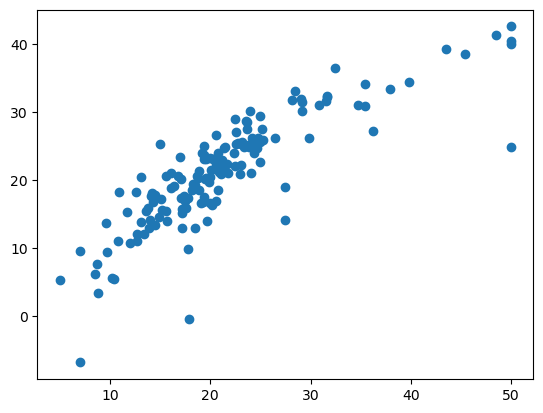

In [33]:
plt.scatter(y_test,reg_pred)
# in general the model is linear tehn it is actually a good model

In [34]:
## Residuals (error)
residuals=y_test-reg_pred
residuals

,Price
173,-5.048960
274,-4.095014
491,-1.811193
72,-2.603213
452,-2.755280
...,...
441,-0.303672
23,1.114059
225,10.016575
433,-2.382863


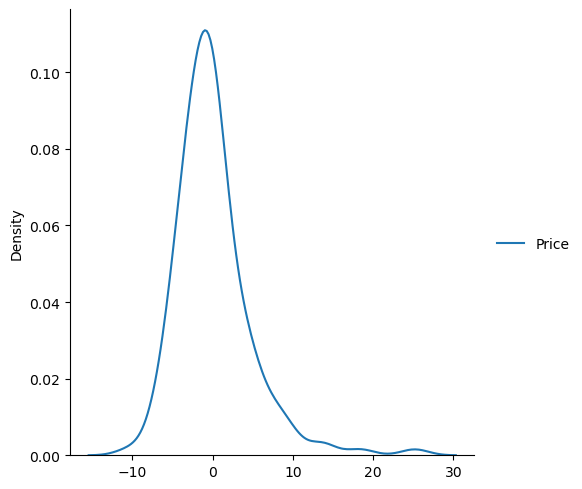

In [35]:
# plot this residulas
sns.displot(residuals,kind='kde')

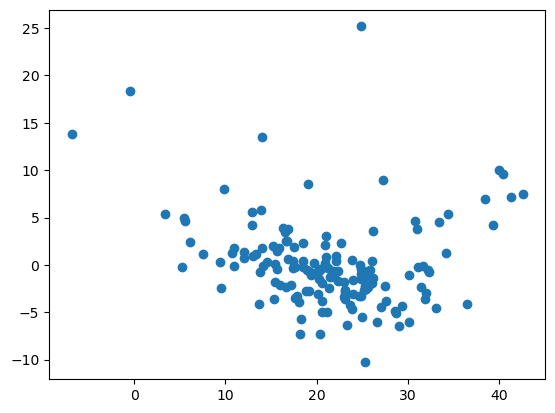

In [36]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.517444231177215
4.638689926172821


R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [38]:

from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


In [39]:
np.array(X.iloc[0]).reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [40]:
# testing
sclar.transform(np.array(X.iloc[0]).reshape(1,-1))

C:\Users\vignesh reddy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [41]:
regression.predict(sclar.transform(np.array(X.iloc[0]).reshape(1,-1)))

C:\Users\vignesh reddy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[30.08649576]])

 picking the model in a file for deployment

In [43]:
import pickle

In [44]:
pickle.dump(sclar,open('scaling.pkl','wb'))

In [ ]:
pickle.dump(regression,open('regmodel.pkl','wb'))


In [100]:
# loading the model adn prediction
pickle_model=pickle.load(open('regmodel.pkl','rb'))

In [101]:
pickle_model.predict(sclar.transform(np.array(X.iloc[0]).reshape(1,-1)))

C:\Users\vignesh reddy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[30.08649576]])